good0
good1
Here In DtnExampleInterface::ReportExBundleTrace:node_number_=10;simulation_duration_=802

[time-0;node-0;line-1560]enter ScheduleTx(), time-+12021325669.0ns,size=345, to node-2

[time-0;node-0;line-1560]enter ScheduleTx(), time-+117981550363.0ns,size=345, to node-9

[time-0;node-0;line-1560]enter ScheduleTx(), time-+94020478268.0ns,size=345, to node-3

[time-0;node-1;line-1560]enter ScheduleTx(), time-+806334457.0ns,size=345, to node-5

[time-0;node-1;line-1560]enter ScheduleTx(), time-+50676573125.0ns,size=345, to node-7

[time-0;node-1;line-1560]enter ScheduleTx(), time-+85401015942.0ns,size=345, to node-8

[time-0;node-2;line-1560]enter ScheduleTx(), time-+3409505929.0ns,size=345, to node-5

[time-0;node-2;line-1560]enter ScheduleTx(), time-+96930379408.0ns,size=345, to node-7

[time-0;node-2;line-1560]enter ScheduleTx(), time-+100785055403.0ns,size=345, to node-7

[time-0;node-3;line-1560]enter ScheduleTx(), time-+55296858285.0ns,size=345, to node-2

[time-0;node-3;lin

<IPython.core.display.Javascript object>


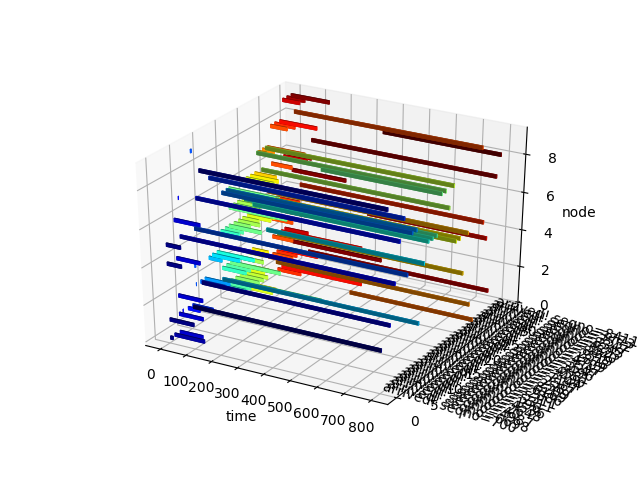

colors count=30
len of seqno_number_list=30
range(0, 30)


In [6]:
%matplotlib notebook
import re
import sys
import inspect
from math import sqrt
import numpy as np
from scipy import integrate
from matplotlib import pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation
#==================================
# This parse script won't parse sprayandwait yet, would cause mass
##################
# define handy func
def nums(s):
    try:
        return int(s)
    except ValueError:
        return float(s)
################
#====
# read the result file
simulation_result_file = open("../../box/dtn_simulation_result/dtnrunninglog.txt", "r")
lines = simulation_result_file.readlines();
simulation_result_file.close()
#====
x_is_one_delivery_route = False
x_simulation_time = -1
x_nodes = -1
x_sch_n = -1
x_arrive_n = 0
x_schedule_list = [] # element is also a list[source, time, destination, seqno]
x_pkt_trace_map = {} # seqno -> [one_hop_snap, one_hop_snap... destination_snap]
# hop_snap , destination_snap = 
#[receive_time, receive_id, dest_id, source_id, seqno, src_generate_time, hop_transmit_time, pkt_type, is_dst, hop_id]
############
# define
def snap_print(snap) :
    print('''seqno :{0}, pkt-type={4}, receive at time-{1} at node-{2}, transmit at time-{3} at node-{5}'''
          .format(snap[4], snap[0], snap[1], snap[6], snap[7], snap[9]))
#############
test_string = r'Here In DtnExampleInterface::ReportExBundleTrace:node_number_=5;simulation_duration_=802'
r11 = re.compile(r'BundleTrace:node_number_=(\d+\.*\d*);simulation_duration_=(\d+\.*\d*)', re.VERBOSE)
test_regx = r11.search(test_string)
if test_regx :
    print("good0")
else :
    print("bad0")
    sys.exit()
    
strss = "[time-5.40052;node-1;line-638]NOTE:BundleTrace:good! one bun\
dle recept, it's one hop! bp_header=,destination ip=10.0.0.3,sour\
ce ip=10.0.0.1,source seqno=139,payload size=345,offset size=345,src time sta\
mp=5,hop time stamp=5,bundle type=BundlePacket"
r22 = re.compile(r'\[time-(\d+\.*\d*);node-(\d+\.*\d*);line-(\d+\.*\d*)\]NOTE:BundleTr\
ace:good!\sone\sbundle\srecept,\sit\'s\sone\shop!\sbp_header=,destination\sip=10.0.0.(\d+\.*\d*),sou\
rce\sip=10.0.0.(\d+\.*\d*),source\sseqno=(\d+\.*\d*),payload\ssize=(\d+\.*\d*),offset\ssi\
ze=(\d+\.*\d*),src\stime\sstamp=(\d+\.*\d*),hop\stime\sstamp=(\d+\.*\d*),bundle\stype=([a-zA-Z]+)', re.VERBOSE)
hopt = r22.match(strss)
if hopt :
    print("good1")
else :
    print("bad1")
    sys.exit()
    
#================================================ dividing parse ========================================
# parse for x_ nodes and x_ simualtion_time
# parse for bundle trace and schedule
avoid_log_twice_bug = False
for line in lines :
    #In DtnExampleRunner
    r0 = re.compile(r'In\sDtnExampleRunner', re.VERBOSE)
    parse_begin = r0.search(line)
    if parse_begin :
        avoid_log_twice_bug = True
        continue
    elif avoid_log_twice_bug :
        # do nothing
        onenomeaning = 1
    else :
        continue
    
    #BundleTrace:node_number_=5;simulation_duration_=802
    r1 = re.compile(r'BundleTrace:node_number_=(\d+\.*\d*);simulation_duration_=(\d+\.*\d*)', re.VERBOSE)
    simulation_preview = r1.search(line)
    
    #[time-5.40052;node-1;line-638]NOTE:BundleTrace:good! one bundle recept, it's one hop! bp_header=,destination ip=10.0.0.3,source ip=10.0.0.1,source seqno=139,payload size=345,offset size=345,src time stamp=5,hop time stamp=5,bundle type=BundlePacket
    r2 = re.compile(r'''\[time\-(\d+\.*\d*);node\-(\d+\.*\d*);line\-(\d+\.*\d*)\]NOTE:BundleTrace:go
    od!\sone\sbundle\srecept\,\sit\'s\sone\shop!\sbp_header=\,destination\sip=10\.0\.0\.(\d+\.*\d*)\,sour
    ce\sip=10\.0\.0\.(\d+\.*\d*)\,source\sseqno=(\d+\.*\d*)\,payload\ssize=(\d+\.*\d*)\,offset\ssiz
    e=(\d+\.*\d*)\,src\stime\sstamp=(\d+\.*\d*)\,hop\stime\ssta
    mp=(\d+\.*\d*)\,hop\sip=10\.0\.0\.(\d+\.*\d*)\,bundle\stype=([a-zA-Z]+)''', re.VERBOSE)
    hop = r2.search(line)
    
    #[time-3.30744;node-1;line-630]NOTE:BundleTrace:Great! one bundle arrive destination! bp_header=,destination ip=10.0.0.2,source ip=10.0.0.1,source seqno=75,payload size=345,offset size=345,src time stamp=3,hop time stamp=3,bundle type=BundlePacket
    r3 = re.compile(r'''\[time\-(\d+\.*\d*);node\-(\d+\.*\d*);line\-(\d+\.*\d*)\]NOTE:BundleTrace:Great!\son
    e\sbundle\sarrive\sdestination!\sbp_header=\,destination\sip=10\.0\.0\.(\d+\.*\d*)\,so
    urce\sip=10\.0\.0\.(\d+\.*\d*)\,source\sseqno=(\d+\.*\d*)\,payload\ssize=(\d+\.*\d*)\,offset\ss
    ize=(\d+\.*\d*)\,src\stime\sstamp=(\d+\.*\d*)\,hop\stime\ssta
    mp=(\d+\.*\d*),hop\sip=10\.0\.0\.(\d+\.*\d*)\,bundle\stype=([a-zA-Z]+)''', re.VERBOSE)
    destination = r3.search(line)
    
    #[time-0;node-0;line-1553]enter ScheduleTx(), time-+3000000000.0ns,size=345, to node-1
    r4 = re.compile(r'''node\-(\d+\.*\d*);line\-(\d+\.*\d*)]enter\sScheduleTx\(\)\,\sti
    me\-\+(\d+\.*\d*)ns\,size=(\d+\.*\d*)\,\sto\snode\-(\d+\.*\d*)''', re.VERBOSE)
    schedule = r4.search(line)
    
    #BundleTrace:Itisonedeliverymethon
    r5 = re.compile(r'''BundleTrace:Itisonedeliverymethon''', re.VERBOSE)
    isonedelivery = r5.search(line)
    
    if schedule :
        print(line)
        sche_source = int(nums(schedule.group(1)))
        sche_time = float(nums(schedule.group(3)) / 1000000000.0)
        sche_destination = int(nums(schedule.group(5)))
        tmp = [sche_source, sche_time, sche_destination, -1]
        x_schedule_list.append(tmp)
    elif isonedelivery :
        x_is_one_delivery_route = True
    elif hop :
        print(line)
        hop_receive_time = float(nums(hop.group(1)))
        hop_receive_id = int(nums(hop.group(2)))
        hop_dest_id = int(nums(hop.group(4)) - int(1))
        hop_source_id = int(nums(hop.group(5)) - int(1))
        hop_seqno = int(nums(hop.group(6)))
        hop_src_generate_time = float(nums(hop.group(9))) # TODO
        hop_hop_transmit_time = float(nums(hop.group(10)))
        hop_hop_id = int(nums(hop.group(11)) - int(1))
        hop_pkt_type = hop.group(12)
        if (hop_hop_transmit_time > hop_receive_time) :
            print('receive time:{0} should < hop_transmit time{1}'.format(hop_receive_time, hop_hop_transmit_time))
            sys.exit()
        tmp = [hop_receive_time, hop_receive_id, hop_dest_id, hop_source_id, hop_seqno,
               hop_src_generate_time, hop_hop_transmit_time, hop_pkt_type, False, hop_hop_id]
        if hop_seqno in x_pkt_trace_map.keys():
            old_list = x_pkt_trace_map[hop_seqno]
            old_list.append(tmp)
            old_list.sort(key=lambda tup: tup[0])
            x_pkt_trace_map[hop_seqno] = old_list
        else:
            new_list = []
            new_list.append(tmp)
            x_pkt_trace_map[hop_seqno] = new_list
    elif simulation_preview :
        print(line)
        x_nodes = int(simulation_preview.group(1))
        x_simulation_time = float(simulation_preview.group(2))
    elif destination :
        print(line)
        dst_receive_time = float(nums(destination.group(1)))
        dst_receive_id = int(nums(destination.group(2)))
        dst_dst_id = int(nums(destination.group(4)) - int(1))
        dst_src_id = int(nums(destination.group(5)) - int(1))
        dst_seqno = int(nums(destination.group(6)))
        dst_src_generate_time = float(nums(destination.group(9)))
        dst_hop_transmit_time = float(nums(destination.group(10)))
        dst_hop_id = int(nums(destination.group(11)) - int(1))
        dst_pkt_type = destination.group(12)
        if (dst_hop_transmit_time > dst_receive_time) :
            print('receive time')
            sys.exit()
        tmp = [dst_receive_time, dst_receive_id, dst_dst_id, dst_src_id, dst_seqno,
               dst_src_generate_time, dst_hop_transmit_time, dst_pkt_type, True, dst_hop_id]
        if dst_seqno in x_pkt_trace_map.keys() :
            old_list = x_pkt_trace_map[dst_seqno]
            old_list.append(tmp)
            old_list.sort(key=lambda tup: tup[0])
            x_pkt_trace_map[dst_seqno] = old_list
        else :
            new_list = []
            new_list.append(tmp)
            x_pkt_trace_map[dst_seqno] = new_list
            
#========================================= end of parse ===================================================

print(r'============= dividing end of parse =============')
if (x_nodes == -1) or (x_simulation_time == -1) :
    print('error_04')
    sys.exit()
#================ now we have every thing we need, refine the data and prepare for visualization
#===== refine x_schedule_list
for sch in x_schedule_list :
    sk = [sch[0], sch[1], sch[2]] # s, t, d
    sn = sch[3]
    if sn != -1 :
        print('error_03')
        sys.exit()
    for key, value in x_pkt_trace_map.items() : #
        #print('value len={0}'.format(len(value)))
        #print(value)
        tk = [value[0][3], value[0][5], value[0][2]]
        seqno = value[0][4]
        if (tk[0] == sk[0] and tk[2] == sk[2] and tk[1] - sk[1] < 0.01) :
            sn = seqno
            break
    if (sn != -1) :
        sch[3] = sn
    else :
        print('error_05')
        sys.exit()
x_sch_n = len(x_schedule_list)

print('============= \n === print your schedule')
print(x_schedule_list)
#===================================== get graph needed list
#
#                                                                                    dstination
x_time_trace_map = {} # seqno -> [src_t, sr_id, hop_t, rec_t, rec_id, hop_t, ... , rec_t, rec_id, x_simulation_time]
####################
#definition
def get_x_time_trace_map(p_x_time_trace_map, p_x_schedule_list, p_x_pkt_trace_map, ref_x_arrive_n) :
    ref_x_arrive_n = 0
    if x_is_one_delivery_route :
        for sch in p_x_schedule_list :
            src_t = sch[1]
            seqno = sch[3]
            if seqno == -1 :
                print('error_01')
                sys.exit()
            sr_id = sch[0]
            tmp = []
            tmp.extend([src_t, sr_id])
            for trace in p_x_pkt_trace_map[seqno] :
                if trace[4] != seqno :
                    print('error_02')
                    sys.exit()
                is_dst = bool(trace[8])
                hop_t = trace[6]
                rec_t = trace[0]
                rec_id = trace[1]
                tmp.extend([hop_t, rec_t, rec_id])
                if is_dst :
                    tmp.append(x_simulation_time)
            if len(tmp) % 3 == 0 :
                ref_x_arrive_n += 1
                p_x_time_trace_map[seqno] = tmp 
            else :
                print('there is one pkt don\'t arrive destination')
                p_x_time_trace_map[seqno] = tmp
    else :
        print('if not one delivery route, this would cause one seqno -> multiply path, it\'s hard to parse, would\
        do this latter')
        print('============ print all hop snap and end ==============')
        for key, snaps in p_x_pkt_trace_map.items() :
            for snap in snaps :
                snap_print(snap)
        print('normal exit')
        sys.exit()
    return ref_x_arrive_n
#end of definition
#################################
x_arrive_n = get_x_time_trace_map(x_time_trace_map, x_schedule_list, x_pkt_trace_map, x_arrive_n)
#===== gonna to make graph|
print('===================================================================================================\
\n===================== report parse result ================')
title_str = '{0} / {1} arrived'.format(x_arrive_n, x_sch_n)
#print(x_time_trace_map)
print(title_str)
###############
# define
def handy_print_2(seqno) :
    for xs in x_schedule_list :
        if xs[3] == seqno :
            print('schedule is: from node-{0} to node-{1} at time-{2}'.format(xs[0], xs[2], xs[1]))
            break
def handy_print_0(st, et, nid) :
    print('from time-{0} => time-{1} in node-{2}'.format(st, et, nid))
def handy_print_1(key, value) :
    print('==================\npkt-seqno:{0}, trace is: '.format(key))
    n_v = int(len(value) / 3)
    is_arrived_traffic = False
    if (n_v * 3 == len(value)) :
        is_arrived_traffic = True
    if (is_arrived_traffic) :
        for cur in range(0, n_v, 1) :
            if cur == n_v - 1 :
                print('received by node-{1} at time-{0} destination :)'.format(value[cur * 3], value[cur * 3 + 1]))
            else :
                handy_print_0(value[cur * 3], value[cur * 3 + 2], value[cur * 3 + 1])
        print('arrived destination\n')
    else :
        for cur in range(0, n_v + 1, 1) :
            if cur == n_v :
                print('received by node-{1} at time-{0}, not destination :('.format(value[cur * 3], value[cur * 3 + 1]))
            else :
                handy_print_0(value[cur * 3], value[cur * 3 + 2], value[cur * 3 + 1])
        print('not arrived destination\n')
    handy_print_2(key)
def handy_draw_0(ax0, st, et, nid, seqnoindex, c) :
    dx = et - st
    ax0.bar3d(st, seqnoindex, nid, dx, 0.2, 0.2, alpha=0.1, color=c, linewidth=0) # alpha = abs(dz[i]/max(dz))
###################################

for key, value in x_time_trace_map.items() :
    handy_print_1(key, value)
print(x_time_trace_map)
#===============
fig = plt.figure()
ax = fig.gca(projection='3d')
colors = plt.cm.jet(np.linspace(0, 1, len(x_schedule_list)))
seqno_number_list = []
for xsele in x_schedule_list :
    seqno_number_list.append(xsele[3])

#=======    
print('colors count={0}'.format(len(colors)))
print('len of seqno_number_list={0}'.format(len(seqno_number_list)))
print(range(0, len(seqno_number_list), 1))

for c, zseqnoindex in zip(colors, range(0, len(seqno_number_list), 1)):
    this_seqno_no = seqno_number_list[zseqnoindex]
    trace_list_of_seqno = x_time_trace_map[this_seqno_no]
    rt_count = int(len(trace_list_of_seqno) / 3)
    is_arrived_traffic_0 = False
    if (rt_count * 3 == len(trace_list_of_seqno)) :
        is_arrived_traffic_0 = True
        
    if is_arrived_traffic_0 :
        for cur in range(0, rt_count, 1) :
            if cur == rt_count - 1 :
                handy_draw_0(ax, trace_list_of_seqno[cur * 3], trace_list_of_seqno[cur * 3 + 2], \
                             trace_list_of_seqno[cur * 3 + 1], zseqnoindex, c)
                ax.text(x_simulation_time, zseqnoindex, 0\
                        , 'arrived! seqno={0}'.format(seqno_number_list[zseqnoindex]), 'x')
            else :
                handy_draw_0(ax, trace_list_of_seqno[cur * 3], trace_list_of_seqno[cur * 3 + 2], \
                             trace_list_of_seqno[cur * 3 + 1], zseqnoindex, c)
    else :
        for cur in range(0, rt_count + 1, 1) :
            if cur == rt_count :
                handy_draw_0(ax, trace_list_of_seqno[cur * 3], trace_list_of_seqno[cur * 3] + 1, \
                             trace_list_of_seqno[cur * 3 + 1], zseqnoindex, c)
                ax.text(x_simulation_time, zseqnoindex, 0\
                        , 'missed! seqno={0}'.format(seqno_number_list[zseqnoindex]), 'x')
            else :
                handy_draw_0(ax, trace_list_of_seqno[cur * 3], trace_list_of_seqno[cur * 3 + 2], \
                             trace_list_of_seqno[cur * 3 + 1], zseqnoindex, c)
#======
ax.set_xlabel('time')
#ax.set_ylabel('')
ax.set_zlabel('node')
plt.show()
#==================

    